In [1]:
!python -m pip install pandas
!python -m pip install numpy
!python -m pip install matplotlib
!python -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [3]:
customers_df.head() 
products_df.head()   
transactions_df.head()  

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [4]:
customers_df.isnull().sum(), products_df.isnull().sum(), transactions_df.isnull().sum()


customers_df = customers_df.drop_duplicates()
products_df = products_df.drop_duplicates()
transactions_df = transactions_df.drop_duplicates()


transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])


customers_df.info(), products_df.info(), transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -

(None, None, None)

In [5]:
customers_df.describe(), products_df.describe(), transactions_df.describe()


customers_df.nunique(), products_df.nunique(), transactions_df.nunique()


(CustomerID      200
 CustomerName    200
 Region            4
 SignupDate      179
 dtype: int64,
 ProductID      100
 ProductName     66
 Category         4
 Price          100
 dtype: int64,
 TransactionID      1000
 CustomerID          199
 ProductID           100
 TransactionDate    1000
 Quantity              4
 TotalValue          369
 Price               100
 dtype: int64)

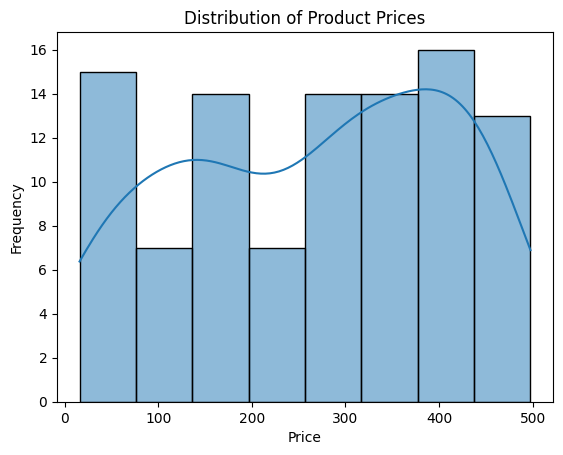

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(products_df['Price'], kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig(r'C:\Users\DELL\Downloads\plot_image1.png')

plt.show()


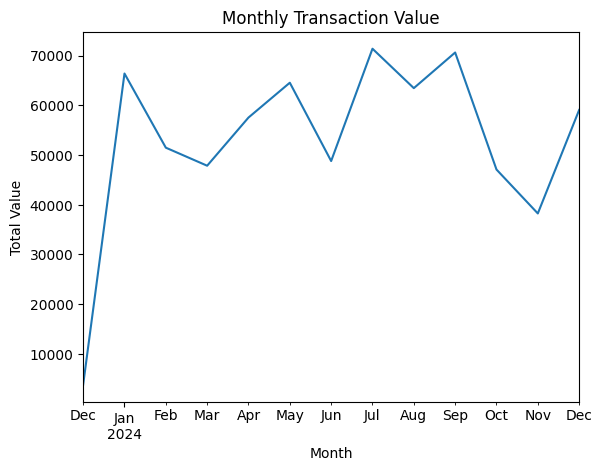

In [7]:
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions_df.groupby('TransactionMonth')['TotalValue'].sum()

monthly_transactions.plot(kind='line', title='Monthly Transaction Value')
plt.ylabel('Total Value')
plt.xlabel('Month')
plt.savefig(r'C:\Users\DELL\Downloads\plot_image2.png')
plt.show()


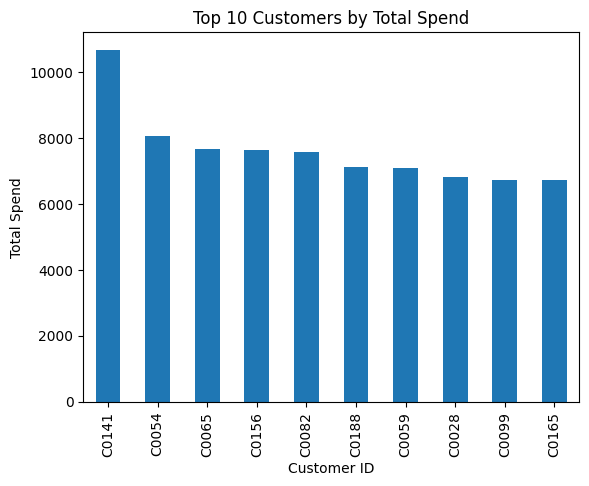

In [8]:
customer_spend = transactions_df.groupby('CustomerID')['TotalValue'].sum()
top_customers = customer_spend.sort_values(ascending=False).head(10)

top_customers.plot(kind='bar', title='Top 10 Customers by Total Spend')
plt.ylabel('Total Spend')
plt.xlabel('Customer ID')
plt.savefig(r'C:\Users\DELL\Downloads\plot_image3.png')
plt.show()

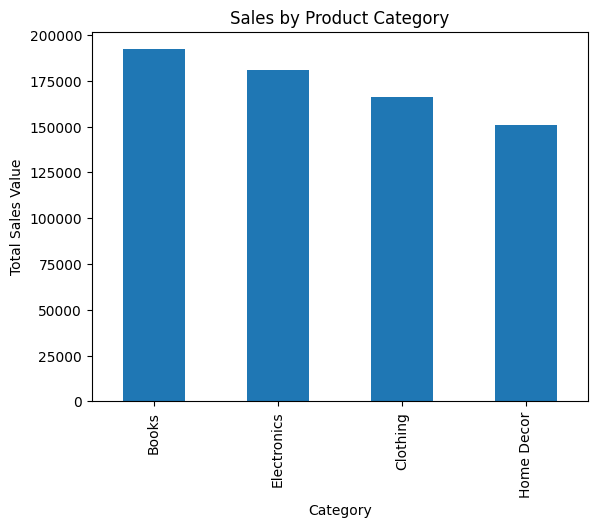

In [9]:
category_sales = transactions_df.merge(products_df, on='ProductID')
category_sales.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).plot(kind='bar', title='Sales by Product Category')
plt.ylabel('Total Sales Value')
plt.xlabel('Category')
plt.savefig(r'C:\Users\DELL\Downloads\plot_image4.png')
plt.show()